In [33]:
## yichi editted
import datetime as dt
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [34]:
HOME_PATH = os.environ['HOME']

In [35]:
HOME_PATH

'/Users/zhangyichi'

In [36]:
#here i made some change to the original py file

In [37]:
DATA_PATH = os.path.join(HOME_PATH, 'Documents', 'project', 'data', 'fordham')

In [38]:
OUTPUT_PATH = os.path.join(HOME_PATH, 'Documents', 'project', 'output', 'fordham')

In [39]:
# check if the output path exist. if not then create a new one and print a reminder
if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)
    print(f"Created directory: {OUTPUT_PATH}")

In [40]:
def get_files(dt_start, dt_end, exchange, instrument_type, symbol):
    span_days = pd.date_range(dt_start, dt_end, freq="D").strftime("%Y%m%d")
    files_for_range = []
    for day in span_days:
        file_path = Path(os.path.join(DATA_PATH, exchange, instrument_type, "level1", day,
                                      symbol + "." + day + ".level1.1min.csv.gz"))

        if not file_path.exists():
            print(f"[FILE NOT FOUND] {file_path}")
            continue

        # why? pandas will automatically untar 
        file_for_day = pd.read_csv(file_path)
        files_for_range.append(file_for_day)
    data = pd.concat(files_for_range)
    return data

In [41]:
def main():
    exchange = "binance"
    instrument_type = "future"

#change dates to cover different periods
    start_date = "20240101"
    end_date = "20240201"

    start_dt = dt.datetime.strptime(start_date, "%Y%m%d")
    end_dt = dt.datetime.strptime(end_date, "%Y%m%d")

    data = get_files(start_dt, end_dt, exchange, instrument_type, "BTCUSDT")
    print("Read ", len(data), " rows")
    print("Keys:", data.keys())

    # Plot1: midprice over time
    plt.figure(figsize=(20, 5))
    plt.plot(data["ts_end"], data["close_mid"])

    plt.xlabel("ts")
    plt.ylabel("price")
    plt.title("Mid Price")

    file_path = os.path.join(OUTPUT_PATH, 'close_mid.png')
    plt.savefig(file_path)
    print("Plot saved to ", file_path)
    plt.close()

    # calculating mid to mid return
    # ret_t = (P_t - P_{t-1}) / P_{t-1}
    data["ret"] = ((data["close_mid"] - data["close_mid"].shift(1)) / data["close_mid"].shift(1)).ffill().fillna(0)

    # Plot2: rate of return
    plt.figure(figsize=(10, 10))
    plt.hist(data["ret"], bins=100)

    plt.yscale("log")  # Set y-axis to logarithmic scale
    plt.xlabel("Returns")
    plt.ylabel("Frequency (Log Scale)")
    plt.title("Histogram of Price Returns")

    file_path = os.path.join(OUTPUT_PATH, 'mid_return_hist.png')
    plt.savefig(file_path)
    print("Plot saved to ", file_path)
    plt.close()
    

In [42]:
if __name__ == "__main__":
    main()

Read  46080  rows
Keys: Index(['ts_end', 'bin_id', 'carryover', 'ramp_up', 'tick_count', 'l3_updates',
       'open_mid', 'first_mid', 'close_mid', 'min_mid', 'max_mid', 'close_bid',
       'close_ask', 'close_bid_size', 'close_ask_size', 'max_bid', 'min_ask',
       'ask_up_ret', 'ask_down_ret', 'bid_up_ret', 'bid_down_ret',
       'median_spread', 'mean_spread', 'min_spread', 'max_spread',
       'mean_bid_size', 'mean_ask_size', 'tick_volatility'],
      dtype='object')
Plot saved to  /Users/zhangyichi/Documents/project/output/fordham/close_mid.png
Plot saved to  /Users/zhangyichi/Documents/project/output/fordham/mid_return_hist.png


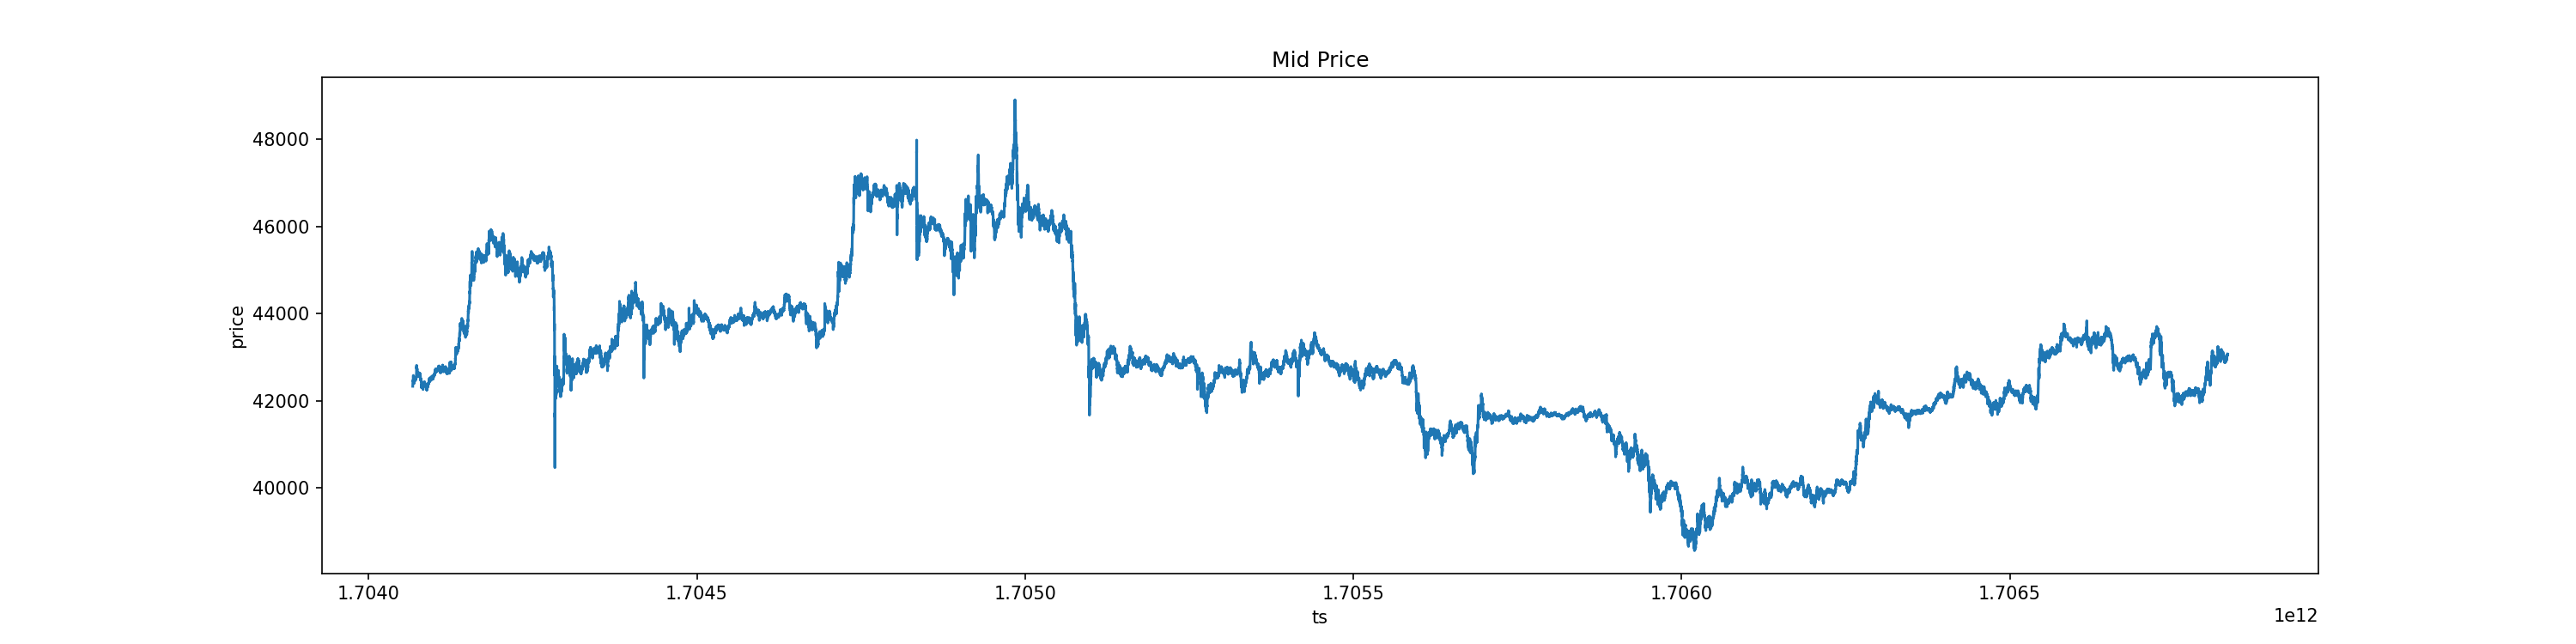

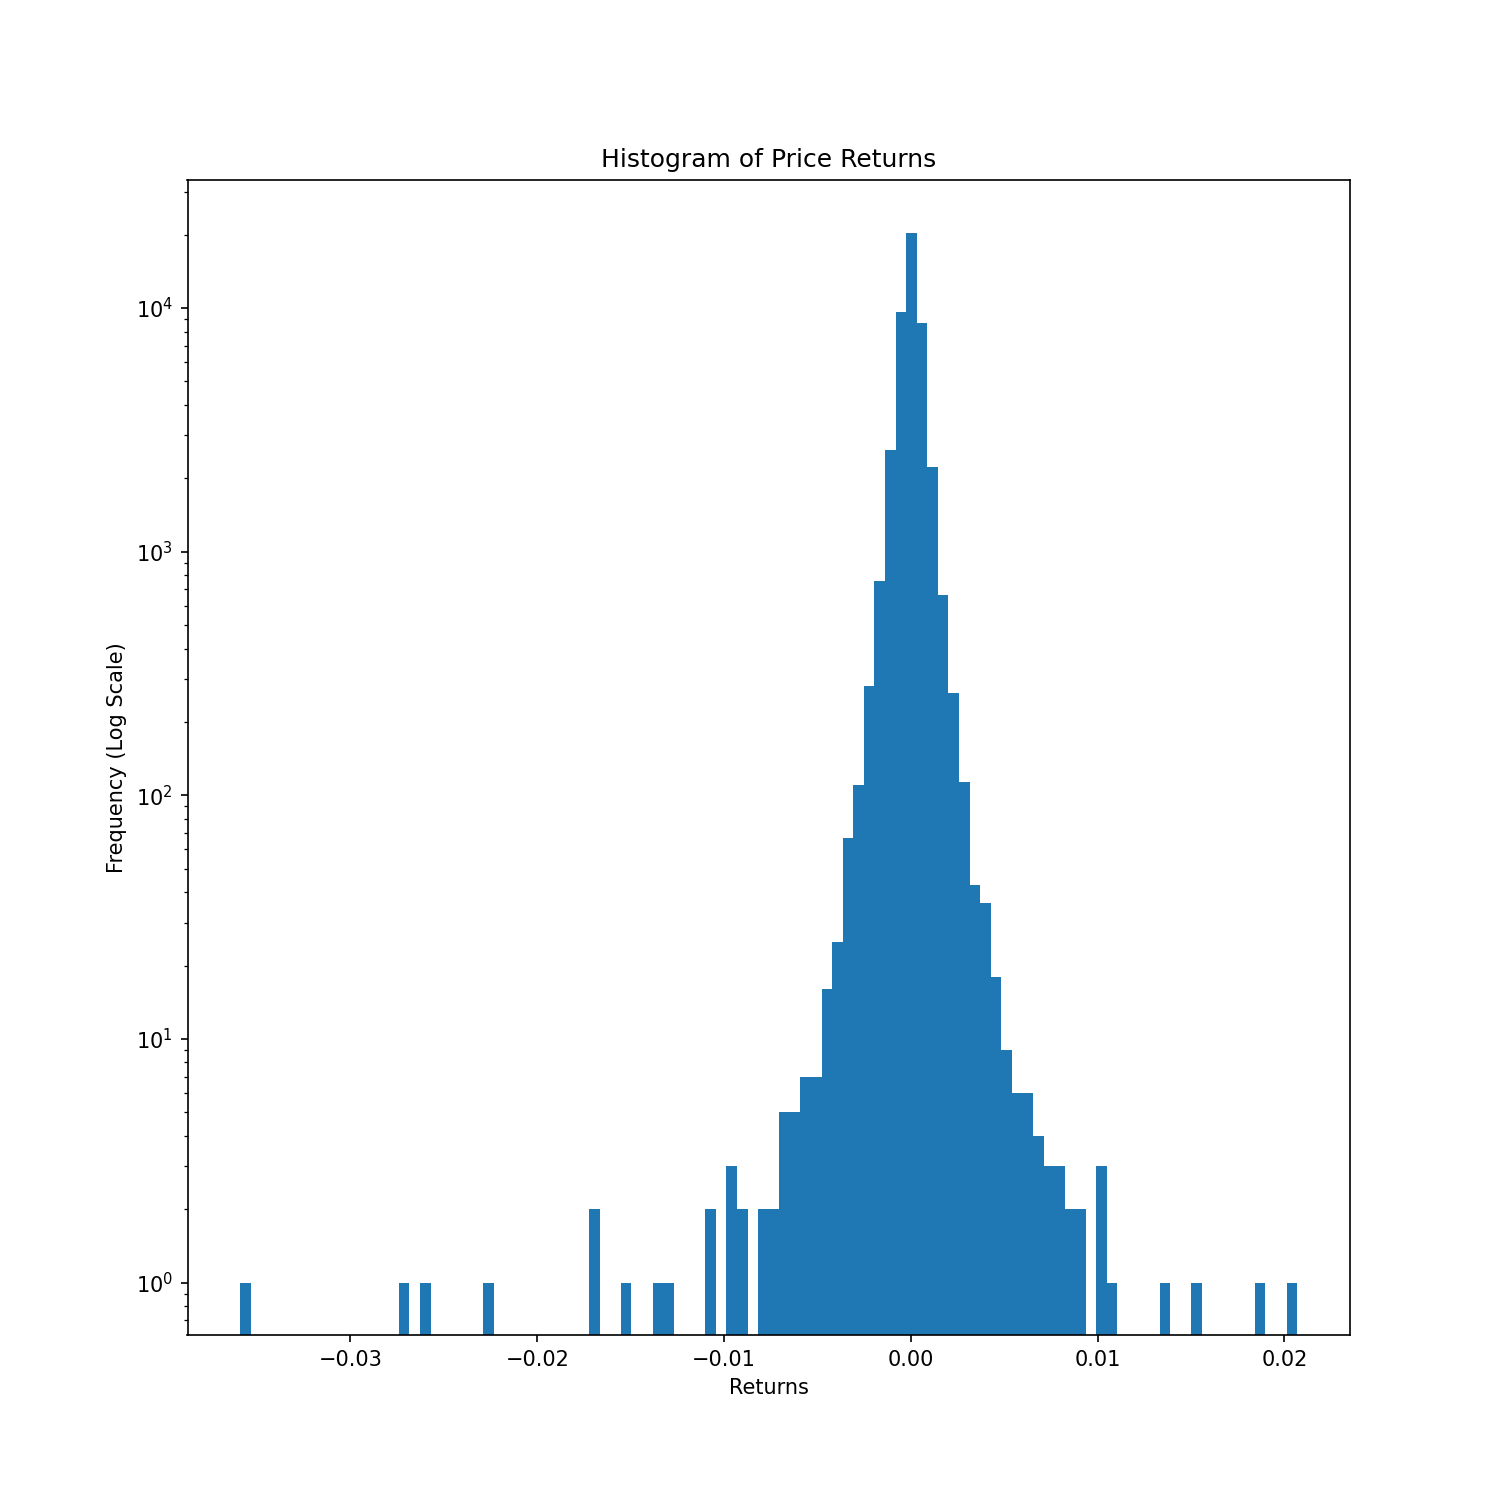

In [43]:
# show the plots, run by yichi, codes are from original file
# this is to see if the codes work. it turns out these 2 plots are correct.
from IPython.display import display, Image
import os

display(Image(filename=os.path.join(OUTPUT_PATH, "close_mid.png")))
display(Image(filename=os.path.join(OUTPUT_PATH, "mid_return_hist.png")))

The upper plot is the mid price time series. The price experiences strong fluctuations, first it when all the way up from 42000 to 48000, then declines. Also the spikes indicate there are short-lived volatility bursts or possible data anomalies. These features are typical behavior of cryptocurrency markets.

The lower plot is histogram of price returns. The distribution is similar to a normal distribution but with heavier tails. Most returns cluster within 0.005, but the tails extend to −0.03 and +0.02, indicating extreme moves. This reflects the presence of rare but large returns, a key feature in financial risk modeling.

In [44]:
exchange = "binance"
instrument_type = "future"
symbol = "BTCUSDT"

start_date = "20240101"
end_date   = "20240201"

start_dt = dt.datetime.strptime(start_date, "%Y%m%d")
end_dt   = dt.datetime.strptime(end_date,   "%Y%m%d")

In [45]:
data = get_files(start_dt, end_dt, exchange, instrument_type, symbol)
print("Read", len(data), "rows")
print("Columns:", list(data.columns))
print("dtype:", data["ts_end"].dtype)
print("head:", data["ts_end"].head().tolist())
print("min/max:", data["ts_end"].min(), data["ts_end"].max())

Read 46080 rows
Columns: ['ts_end', 'bin_id', 'carryover', 'ramp_up', 'tick_count', 'l3_updates', 'open_mid', 'first_mid', 'close_mid', 'min_mid', 'max_mid', 'close_bid', 'close_ask', 'close_bid_size', 'close_ask_size', 'max_bid', 'min_ask', 'ask_up_ret', 'ask_down_ret', 'bid_up_ret', 'bid_down_ret', 'median_spread', 'mean_spread', 'min_spread', 'max_spread', 'mean_bid_size', 'mean_ask_size', 'tick_volatility']
dtype: float64
head: [1704067260000.0, 1704067320000.0, 1704067380000.0, 1704067440000.0, 1704067500000.0]
min/max: 1704067260000.0 1706832000000.0


In [46]:
# required part 1:Calculate midprice returns for different time intervals: 1min, 5min, 15min, 60min, plot return distributions on the same plot.
# repeat data fetching in main, this is better to run in pynb.
import numpy as np
import matplotlib as mpl
NAME = "Yichi Zhang"  

mpl.rcParams['figure.dpi'] = 150
# Create a readable time column
if "ts_end_dt" not in data.columns:
    data["ts_end_dt"] = pd.to_datetime(data["ts_end"], unit="ms", errors="coerce")

data = data.sort_values("ts_end_dt").set_index("ts_end_dt")

Saved: /Users/zhangyichi/Documents/project/output/fordham/return_dists_multi_horizon.png


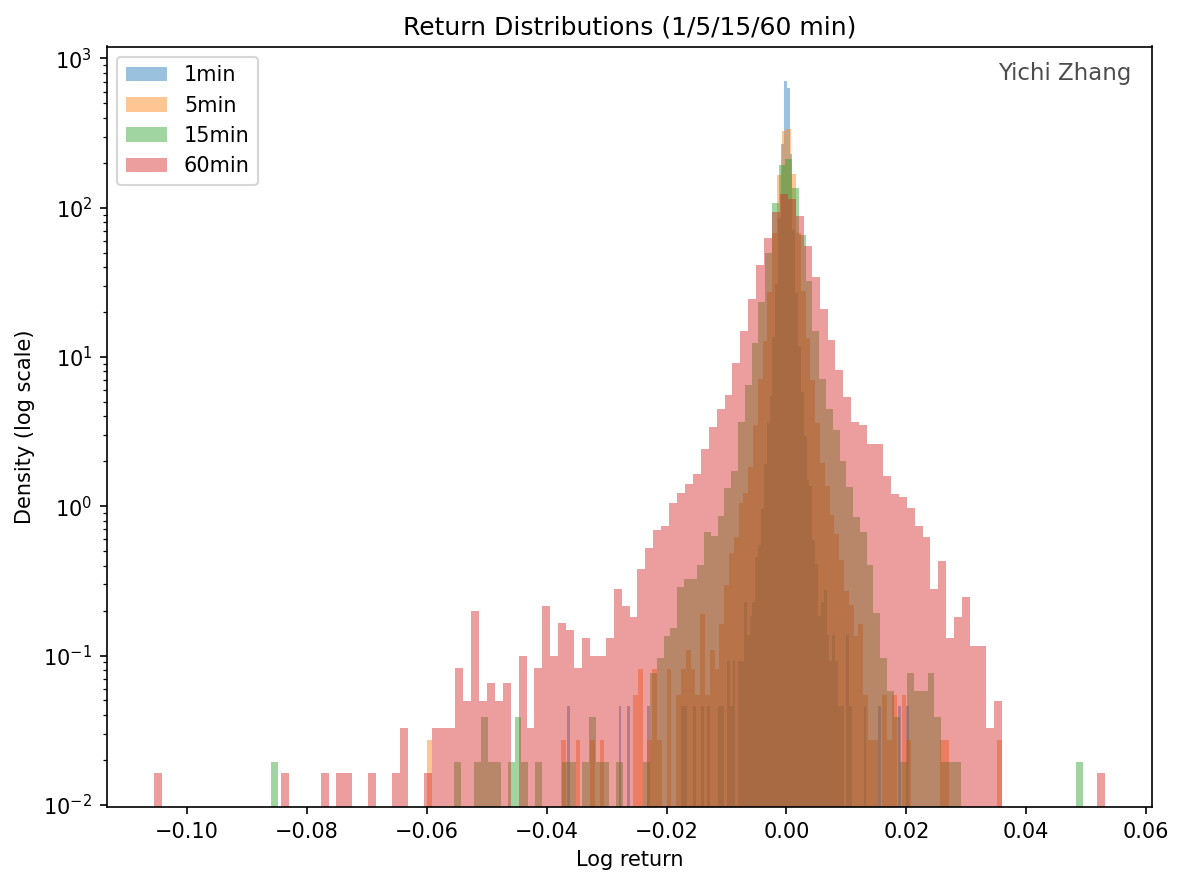

In [47]:
# r_t^(n) = log(P_t) - log(P_{t-n})
logp = np.log(data["close_mid"])

intervals = [1, 5, 15, 60]   
rets = {}
for n in intervals:
    rets[f"{n}min"] = logp.diff(n).dropna()

# make sure it's in one plot
plt.figure(figsize=(8, 6))
bins = 120   
for k, v in rets.items():
    plt.hist(v, bins=bins, density=True, alpha=0.45, label=k)

plt.yscale("log")  
plt.xlabel("Log return")
plt.ylabel("Density (log scale)")
plt.title("Return Distributions (1/5/15/60 min)")
plt.legend()
# sign my name: Yichi Zhang
plt.text(0.98, 0.98, NAME, transform=plt.gca().transAxes,
         ha="right", va="top", fontsize=11, alpha=0.7)

png_path = os.path.join(OUTPUT_PATH, "return_dists_multi_horizon.png")
plt.tight_layout()
plt.savefig(png_path, bbox_inches="tight")
print("Saved:", png_path)
plt.show()

Is there a pattern: 

Yes, when the return interval increases, the distributions become wider. The histograms also look smoother for longer horizons because they aggregate more price changes.

Does the width of the distribution change depending on the return interval?

Yes. The standard deviation grows with the length of the return interval:
1-minute returns are tightly clustered around zero.
5-minute returns spread wider.
15-minute and 60-minute returns show larger variability, with more mass in the tails.

How to explain the pattern:

This pattern reflects property of financial time series. Intuitively, when the market was given more time, there are more opportunities for the price ti move, which means larger possible returns. We can deduce that the volatility follows the square root of time. Mathematically this means the distribution widens at longer horizons.

In [48]:
# full grades part:
import matplotlib.dates as mdates
mpl.rcParams['figure.dpi'] = 150

# Convert UTC timestamps to date
data["ts_utc_dt"] = pd.to_datetime(data["ts_end"], unit="ms", utc=True)
# add it to the X axis
data = data.sort_values('ts_utc_dt').set_index('ts_utc_dt')

# Calculate 1-minute logarithmic returns
ret_1min = logp.diff().fillna(0.0)

# I prefer sliding window:
WINDOW = 60  
# ddof=1
sigma_1m_rw = ret_1min.rolling(WINDOW).std(ddof=1)
sigma_60m_rw = sigma_1m_rw * np.sqrt(WINDOW)

Saved: /Users/zhangyichi/Documents/project/output/fordham/midprice_with_annualized_60m_vol.png


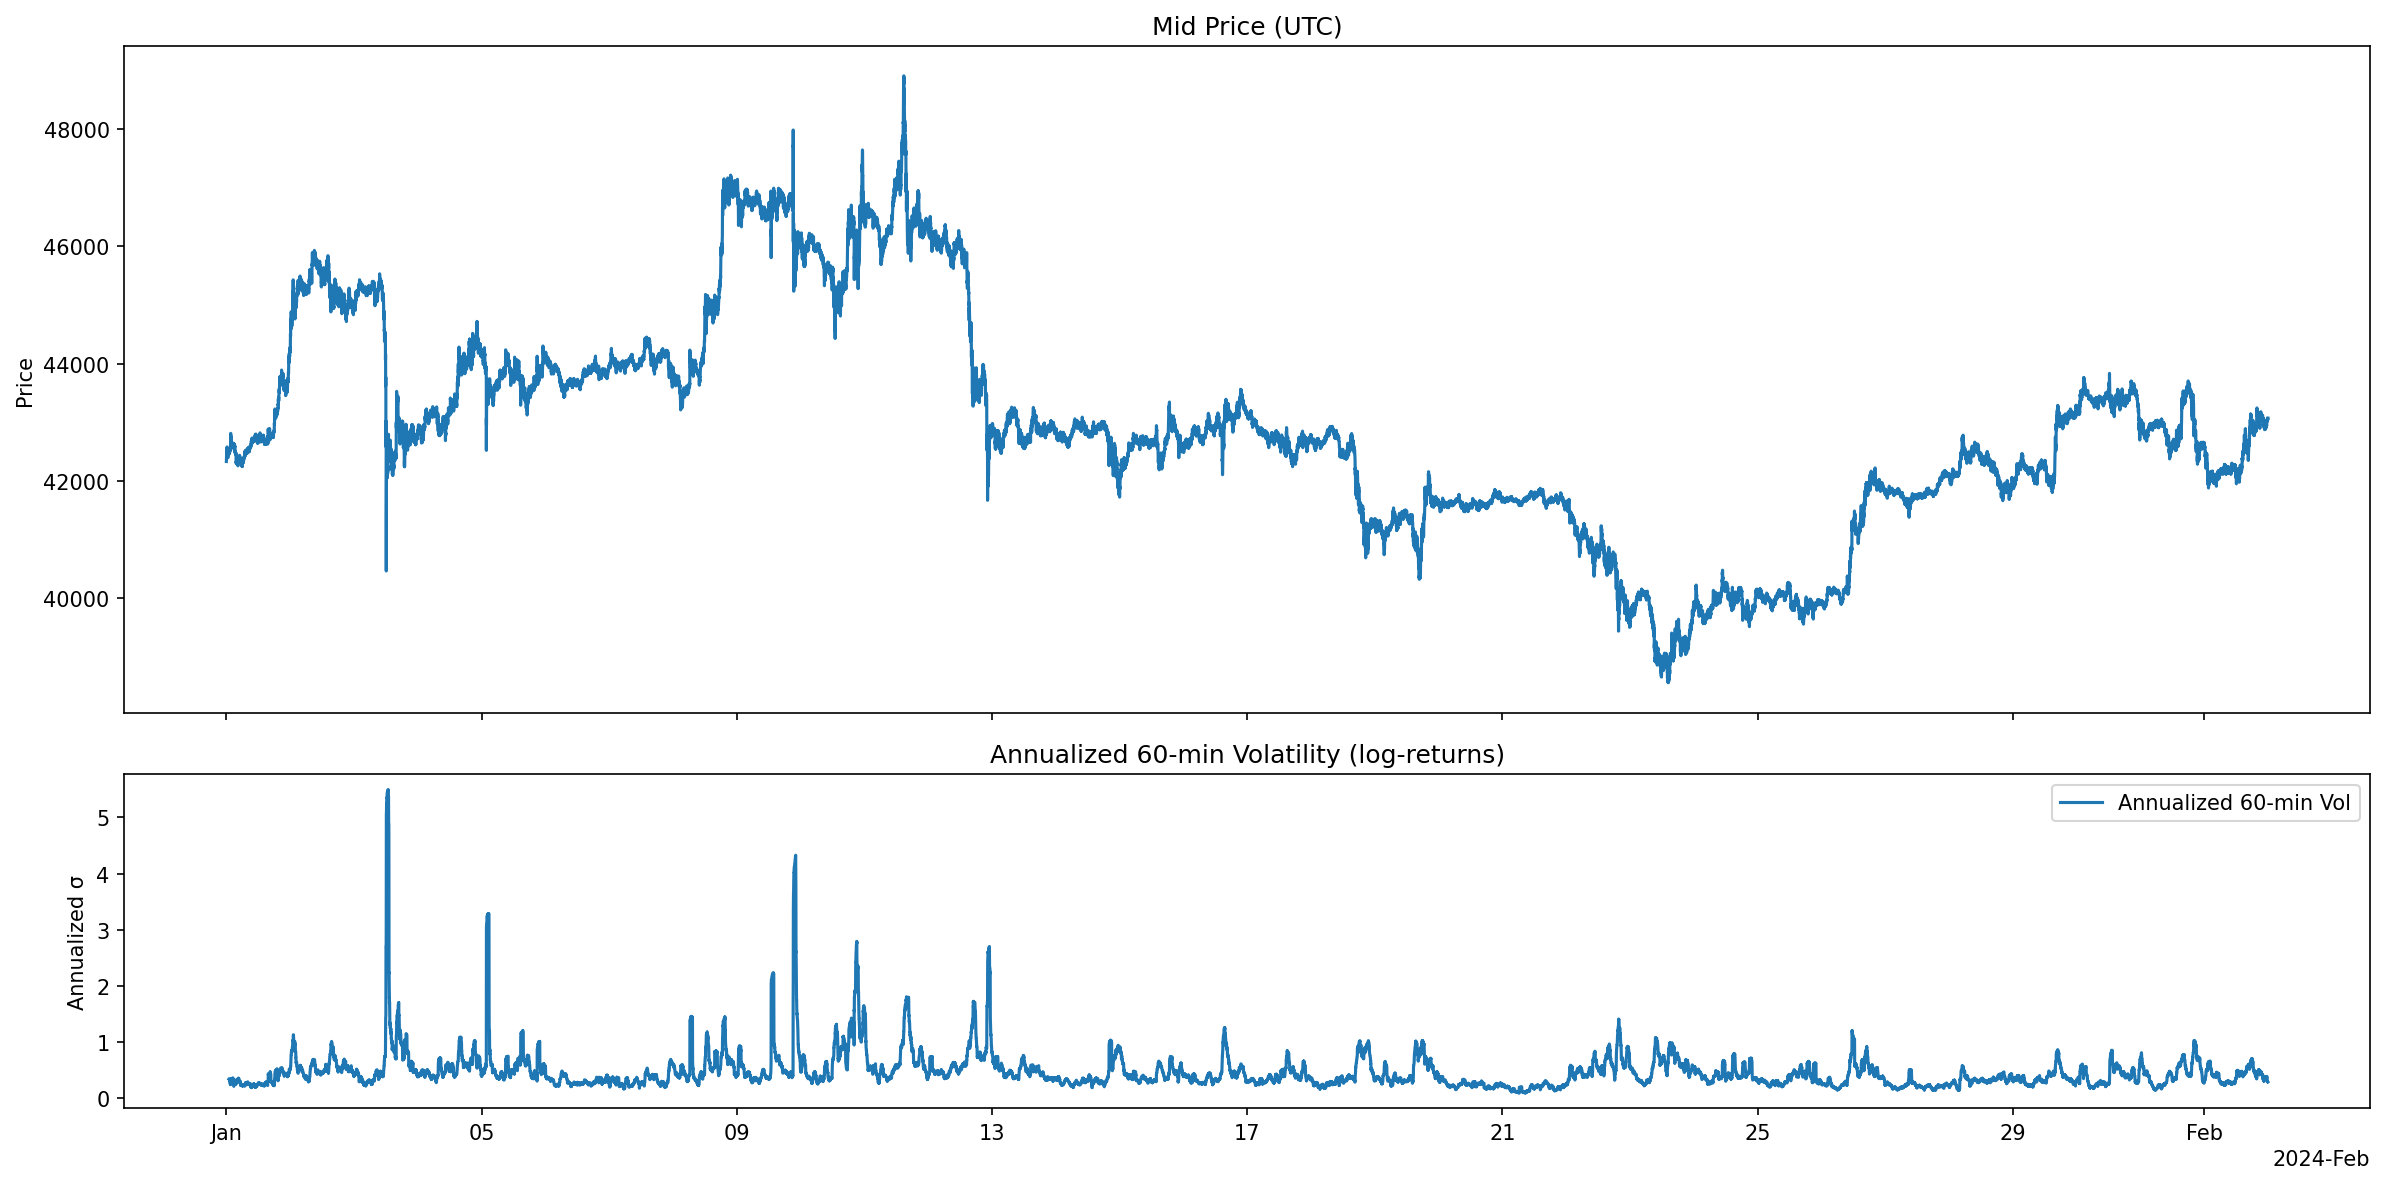

In [49]:
HOURS_PER_YEAR = 24 * 365
ANNUALIZE_H = np.sqrt(HOURS_PER_YEAR)

sigma_60m = sigma_60m_rw  

vol_60m_annual = sigma_60m * ANNUALIZE_H

# plot time series below the midprice plot. 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True,
                               gridspec_kw={'height_ratios':[2,1]})

# upper
ax1.plot(data.index, data["close_mid"])
ax1.set_title("Mid Price (UTC)")
ax1.set_ylabel("Price")

# lower
ax2.plot(vol_60m_annual.index, vol_60m_annual, label="Annualized 60-min Vol")
ax2.set_title("Annualized 60-min Volatility (log-returns)")
ax2.set_ylabel("Annualized σ")
ax2.legend(loc="upper right")

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)

plt.tight_layout()
out_path = os.path.join(OUTPUT_PATH, "midprice_with_annualized_60m_vol.png")
plt.savefig(out_path, bbox_inches="tight")
print("Saved:", out_path)
plt.show()

The upper plot is very similar to the one we plotted earlier, but there is a significant difference that the x-axis is UTC timestamps, which makes it more interpretable.

When prices fluctuate significantly, the annualized volatility of the 60m chart below will rise significantly.

In [50]:
v = vol_60m_annual.dropna()
print("Annualized 60-min vol (summary):")
print(v.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))

Annualized 60-min vol (summary):
count    46021.000000
mean         0.479652
std          0.366833
min          0.092631
10%          0.229857
25%          0.290934
50%          0.395489
75%          0.554230
90%          0.781384
max          5.497152
Name: close_mid, dtype: float64


In [54]:
def get_files_trade(dt_start, dt_end, exchange, instrument_type, symbol, data_type="level1"):
    span_days = pd.date_range(dt_start, dt_end, freq="D").strftime("%Y%m%d")
    frames = []

    for day in span_days:
        day_dir = Path(DATA_PATH) / exchange / instrument_type / data_type / day

        if data_type == "level1":
            filename = f"{symbol}.{day}.level1.1min.csv.gz"
        elif data_type == "trade":
            filename = f"{symbol}.{day}.trade.1min.csv.gz"
        else:
            raise ValueError("data_type must be 'level1' or 'trade'")

        file_path = day_dir / filename
        if not file_path.exists():
            print(f"[MISS FILE] {file_path}")
            continue

        df = pd.read_csv(file_path)
        frames.append(df)

    if not frames:
        raise FileNotFoundError(f"No {data_type} files found in given range.")
    return pd.concat(frames, ignore_index=True)

In [55]:
trade_data = get_files_trade(start_dt, end_dt, "binance", "future", "BTCUSDT", data_type="trade")
print("Trade rows:", len(trade_data))
print("Trade columns:", list(trade_data.columns))

Trade rows: 46080
Trade columns: ['ts_end', 'bin_id', 'carryover', 'ramp_up', 'trade_count', 'buy_trade_count', 'sell_trade_count', 'taker_trade_count', 'taker_buy_trade_count', 'taker_sell_trade_count', 'open_price', 'first_price', 'close_price', 'min_price', 'max_price', 'median_price', 'volume', 'buy_volume', 'sell_volume', 'vwap', 'buy_vwap', 'sell_vwap', 'trade_volatility']


In [57]:
trade_data["ts_dt"] = pd.to_datetime(trade_data["ts_end"], unit="ms", utc=True)

# Aggregate by minute
trade_1m = (
    trade_data
    .set_index("ts_dt")
    .groupby(pd.Grouper(freq="1T"))
    .agg({
        "volume": "sum",
        "buy_volume": "sum",
        "sell_volume": "sum",
        "trade_count": "sum",
        "buy_trade_count": "sum",
        "sell_trade_count": "sum",
        "close_price": "last",
        "vwap": "last",
    })
)

print(trade_1m[["volume","buy_volume","sell_volume","trade_count"]].head())

                            volume  buy_volume  sell_volume  trade_count
ts_dt                                                                   
2024-01-01 00:01:00+00:00  289.641     175.211      114.430         3310
2024-01-01 00:02:00+00:00  202.444     154.353       48.091         1885
2024-01-01 00:03:00+00:00  271.521     193.034       78.487         2143
2024-01-01 00:04:00+00:00  392.238     332.749       59.489         3551
2024-01-01 00:05:00+00:00  568.366     419.524      148.842         4479


/var/folders/53/d8021vbn6h5gynd0y2d2pxn80000gn/T/ipykernel_2131/3585392891.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq="1T"))


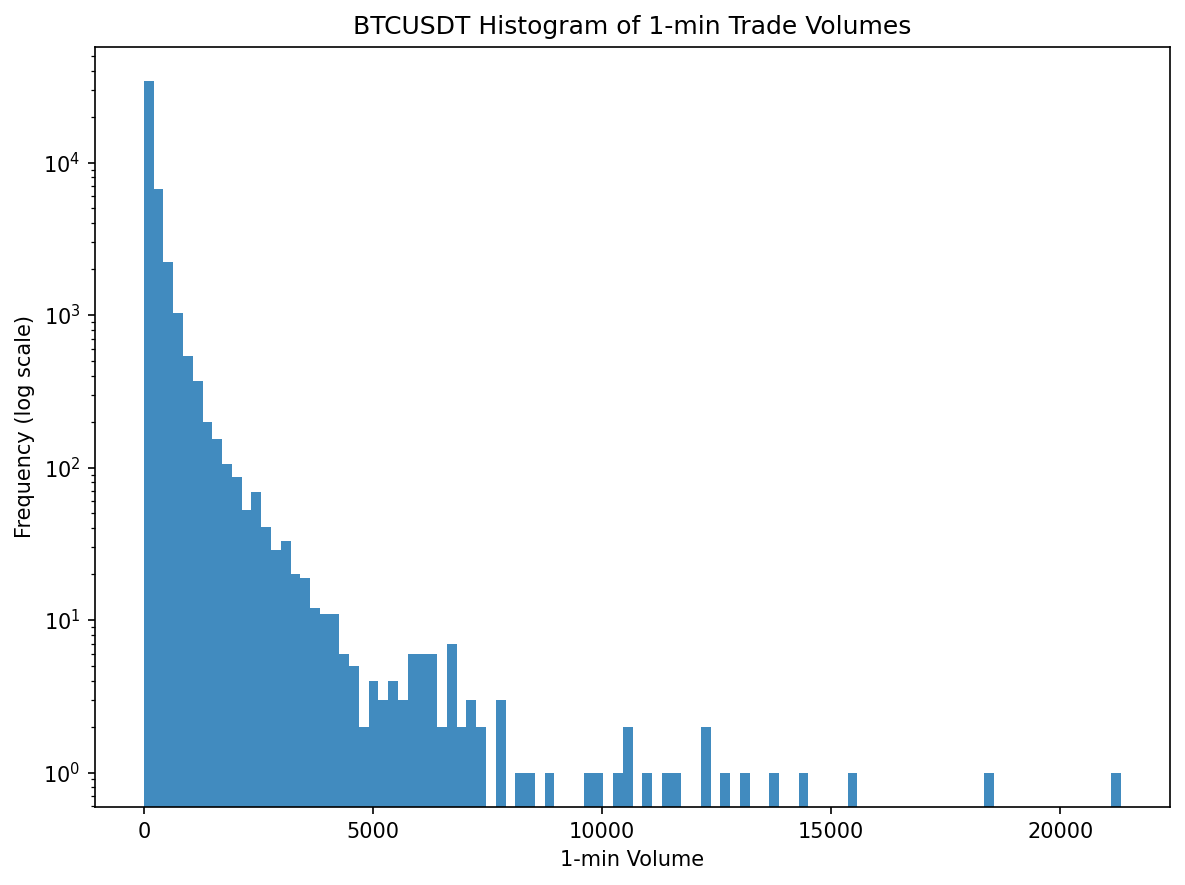

In [58]:
# volume distribution histogram
plt.figure(figsize=(8,6))
plt.hist(trade_1m["volume"].dropna(), bins=100, alpha=0.85)
plt.yscale("log")
plt.xlabel("1-min Volume")
plt.ylabel("Frequency (log scale)")
plt.title(f"{symbol} Histogram of 1-min Trade Volumes")
plt.tight_layout()
plt.show()

/var/folders/53/d8021vbn6h5gynd0y2d2pxn80000gn/T/ipykernel_2131/414361488.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  mid_1m = data["close_mid"].resample("1T").last()


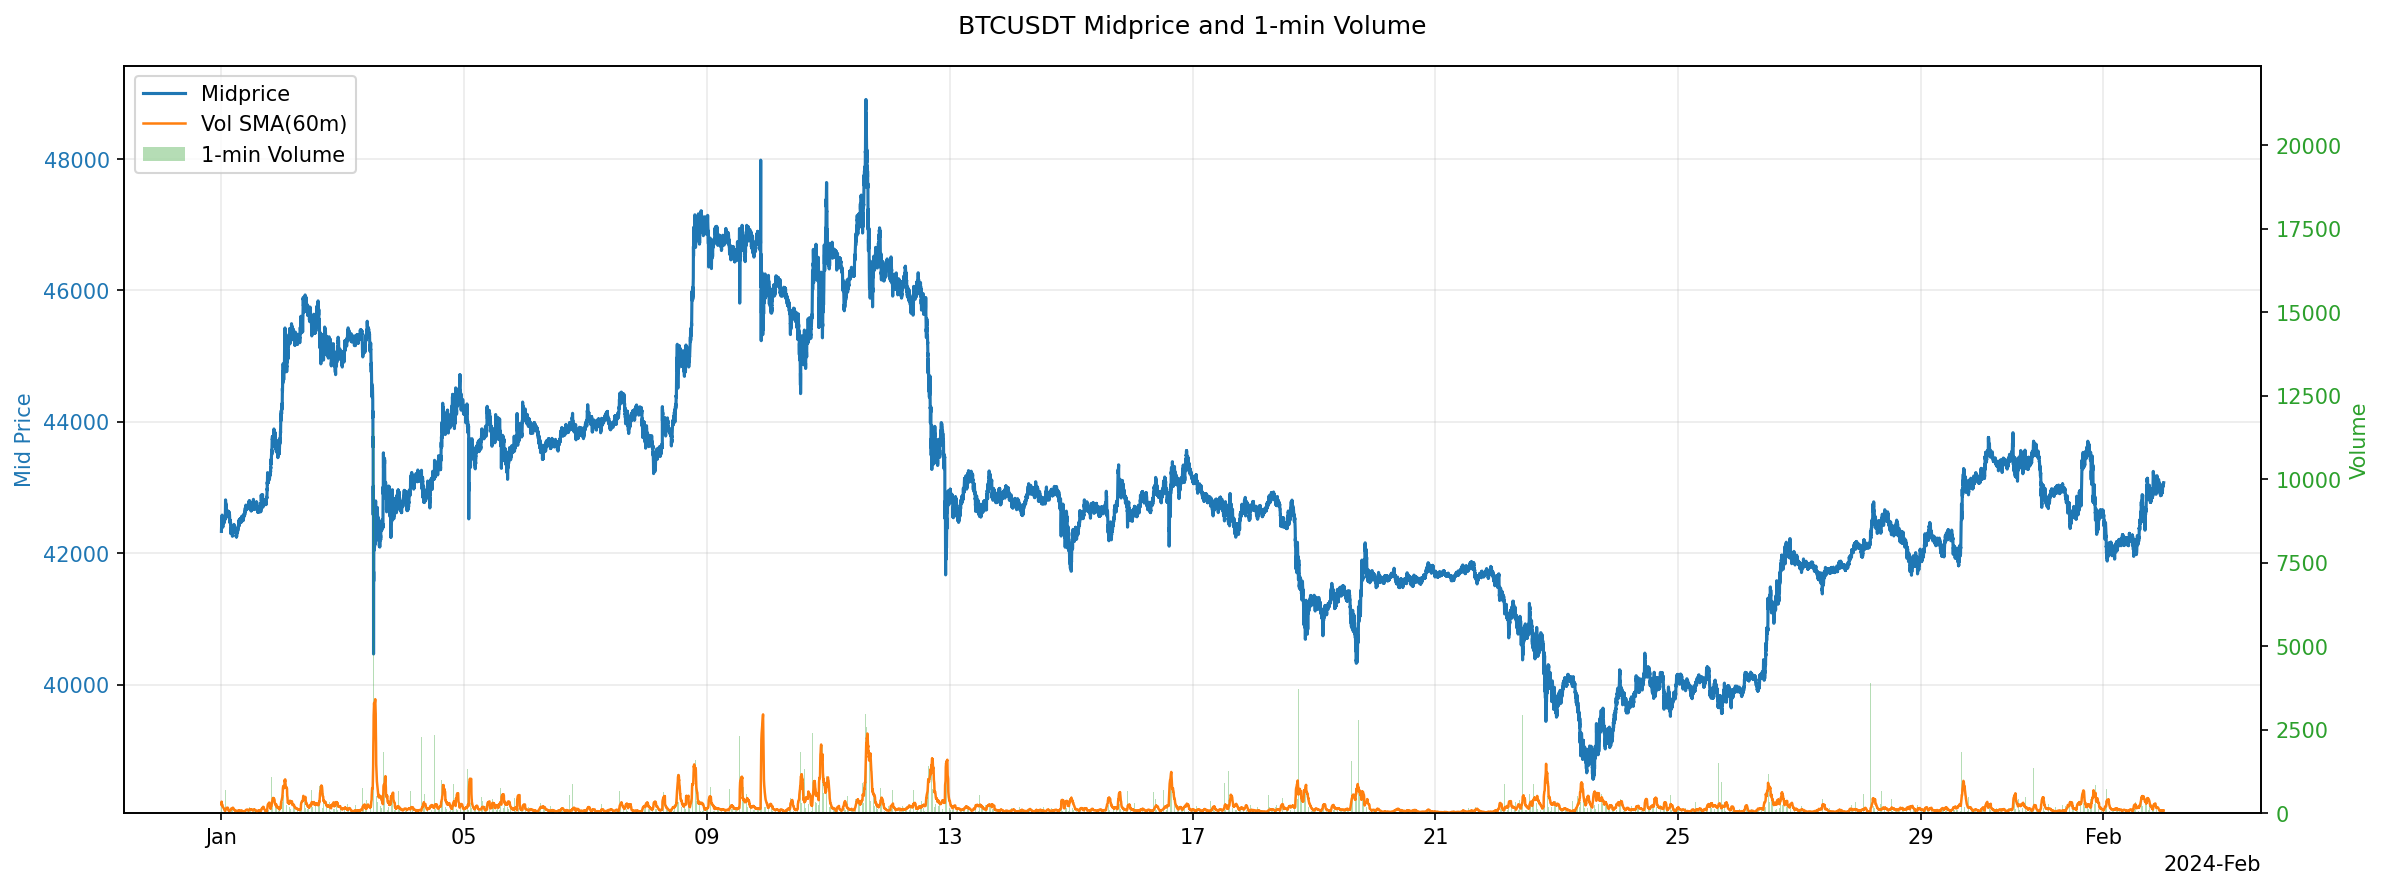

In [59]:
# Align two time series to a uniform
mid_1m = data["close_mid"].resample("1T").last()
vol_1m = trade_1m["volume"].fillna(0)
common_idx = mid_1m.index.intersection(vol_1m.index)
mid_1m = mid_1m.loc[common_idx]
vol_1m = vol_1m.loc[common_idx]


vol_sma_60 = vol_1m.rolling(60, min_periods=1).mean()
fig, ax1 = plt.subplots(figsize=(16,6))

# left：midprice
ax1.plot(common_idx, mid_1m.values, color="tab:blue", lw=1.5, label="Midprice")
ax1.set_ylabel("Mid Price", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(alpha=0.25)

# right：volume time series over time
ax2 = ax1.twinx()
ax2.bar(common_idx, vol_1m.values, width=30/86400, color="tab:green", alpha=0.35, label="1-min Volume")
ax2.plot(common_idx, vol_sma_60.values, color="tab:orange", lw=1.2, label="Vol SMA(60m)")
ax2.set_ylabel("Volume", color="tab:green")
ax2.tick_params(axis="y", labelcolor="tab:green")

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines+lines2, labels+labels2, loc="upper left")

fig.suptitle(f"{symbol} Midprice and 1-min Volume", y=0.98)
fig.tight_layout()
plt.show()

The midprice starts near 42,000, climbs above 48,000, then gradually declines below 41,000, later rebounding toward 43,000–44,000. Price swings are large and volatile. The volume shows Spikes in 1-minute volume occur irregularly. Also the largest volume spikes coincide with major price moves.

Combining these 2 charts together, we can see The largest volume spikes coincide with major price moves. Volume increases when new information hits the market, causing larger midprice fluctuations. Alternatively, when prices move sideways, both 1-min volume and its 60-min SMA remain subdued.

Research ideas: By analyzing the stylized featurs of the cryptocurrency market, we can develop further reasearch towarding differents aspects. Firstly, we can try to quantify the correlation between trading volume and volatility or apply different time series models or stochastic models to capture trhe clustering. Secondly, we can Collect event timestamps such as macro news, crypto exchange outages, liquidations. Then study abnormal returns/volatility around these events to test whether market reacts symmetrically to positive versus negative news. 